<a href="https://colab.research.google.com/github/RoshanMaharjan7/Concepts-and-Technologies-of-AI/blob/main/Roshan_Maharjan_2408424_Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Roshan Maharjan\
Student Id: 2408424

#3 To - Do Exercise:

#Problem - 1: Perform a classification task with knn from scratch.

##1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('/content/drive/MyDrive/Concepts of AI/Week4/diabetes.csv')

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [2]:
print("First few rows of the dataframe:")
print(diabetes_df.head())

print("\nThe data types of the dataframe:")
print(diabetes_df.dtypes)

print("\nThe summary statistics of the dataframe:")
print(diabetes_df.describe())

print("\nThe missing values of the dataframe:")
print(diabetes_df.isnull().sum())

First few rows of the dataframe:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

The data types of the dataframe:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunc

##2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [3]:
missing_info = diabetes_df.isnull().sum() / len(diabetes_df) * 100
# Handle missing values
for column in diabetes_df.columns:
  if missing_info[column] > 10: # If more than 10% missing
    diabetes_df[column].fillna(diabetes_df[column].mean(), inplace=True)
  else: # If less than 10% missing
    diabetes_df.dropna(subset=[column], inplace=True)

print("\nMissing values after processing:\n", diabetes_df.isnull().sum())



Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

In [4]:
X = diabetes_df.drop(columns=['Outcome']).values
y = diabetes_df['Outcome'].values

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [5]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]

  # X_train = X_train.astype(np.int64)
  # X_test = X_test.astype(np.int64)
  # y_train = y_train.astype(np.int64)
  # y_test = y_test.astype(np.int64)
  return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


##4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.

In [6]:
def euclidean_distance(point1, point2):
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance


def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


• Evaluate the performance using accuracy.

In [7]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy*100

try:
  y_pred = knn_predict(X_test, X_train, y_train, k=3)
  accuracy = compute_accuracy(y_test, y_pred)
except Exception as e:
  print(f"An unexpected error occurred: {e}")

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.39%


#Problem - 2 - Experimentation:

##1. Repeat the Classification Task:

• Scale the Feature matrix X.\
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split on scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:
  – How scaling impacted the KNN performance.
  
  – The reason for any observed changes in accuracy.

In [9]:
# Predictions and accuracy for scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

print(f"Accuracy on Scaled Data (k=3): {accuracy_scaled:.2f}%")

Accuracy on Scaled Data (k=3): 69.13%


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

  – Accuracy.
  
  – Time taken to make predictions.

In [10]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracies_original = []
accuracies_scaled = []
times_original = []
times_scaled = []

for k in k_values:
    # Measure time and accuracy for original data
    start = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k)
    times_original.append(time.time() - start)
    accuracies_original.append(compute_accuracy(y_test, predictions))

    # Measure time and accuracy for scaled data
    start = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k)
    times_scaled.append(time.time() - start)
    accuracies_scaled.append(compute_accuracy(y_test_scaled, predictions_scaled))

2. Visualize the Results:

• Plot the following graphs:

  – k vs. Accuracy for original and scaled datasets.

  – k vs. Time Taken for original and scaled datasets.


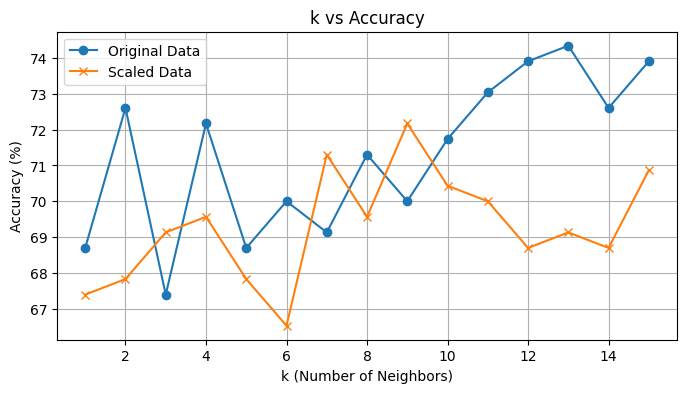

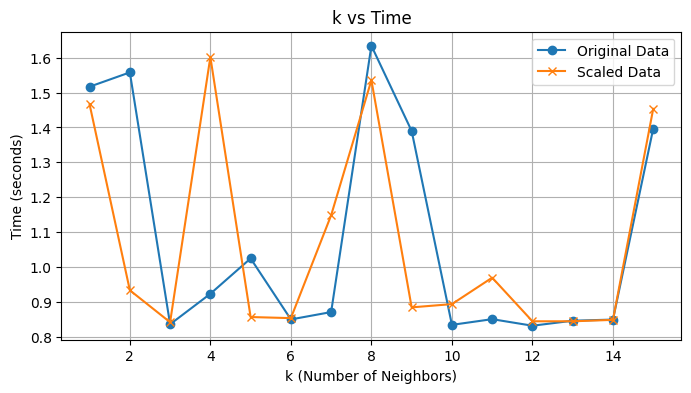

In [11]:
# Plot k vs Accuracy
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_original, label='Original Data', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs Time
plt.figure(figsize=(8, 4))
plt.plot(k_values, times_original, label='Original Data', marker='o')
plt.plot(k_values, times_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:
  • Discuss how the choice of k affects the accuracy and computational cost.

  • Identify the optimal k based on your analysis.

The accuracy and computing cost of the k-Nearest Neighbors (k-NN) method are greatly impacted by the choice of k. The model is highly dependent on the closest neighbors when k is small, such k=1 or k=2, which leaves it vulnerable to noise and data outliers. This frequently results in overfitting even while it enables the model to grasp intricate decision boundaries and local trends. In contrast, the model smoothes decision boundaries and lessens the impact of noise when k is big, such as k=10 or more, by averaging the contribution of numerous neighbors. The model may underfit as a result of this generalization, overlooking significant fine-grained patterns in the data.

Because the method must sort more neighbors to reach the top k, raising k lengthens the prediction time from a computing standpoint. With a smaller k, predictions are made more quickly since fewer neighbors must be assessed. However, sorting a larger subset of distances is necessary for bigger values of k, which raises the computing cost. These trade-offs are balanced by the optimal value of k. Moderate values, such k=5 to k=7, offer the best performance, obtaining excellent accuracy while keeping computation times acceptable, according to empirical studies. Accuracy tends to plateau or marginally decline beyond this range, and computing costs increase.


